In [43]:
!pip install xgboost
!pip install catboost
!pip install statsmodels


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [46]:
data = pd.read_csv("data.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [47]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# We have 18 Object value and two Int and one Float value

In [49]:
# we will check if we have any Null value in Data
data.isnull().any().any()

False

In [50]:
data.shape

(7043, 21)

In [51]:
!pip install missingno

<Axes: >

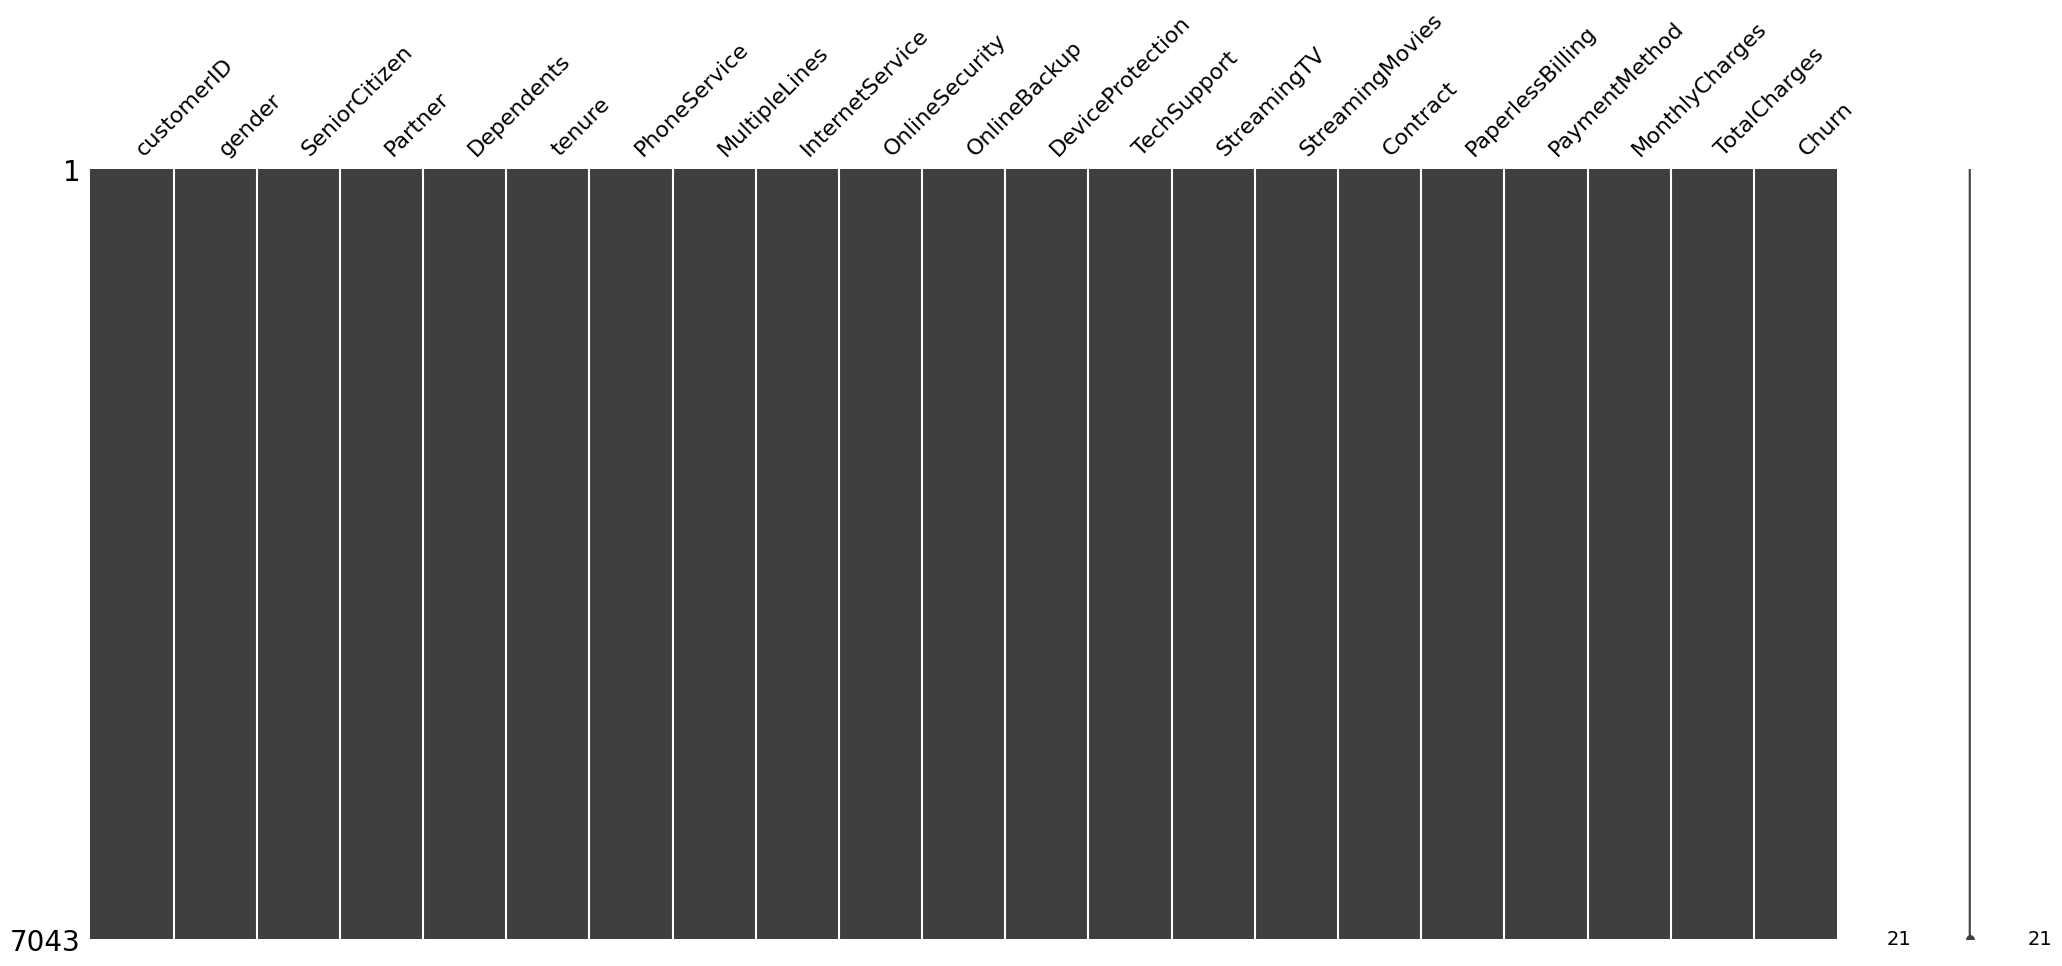

In [52]:
# this code imports the missingno library and uses it to create a visual matrix representation of missing values in a given pandas DataFrame (data).
#This can be particularly useful for data cleaning and preprocessing steps in data analysis,
#as it allows you to see where data is missing and how it might impact your analysis.
import missingno as msno
msno.matrix(data)


In [53]:
# We dont need customer ID column for prediction (Useless)
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
# Check TotalCharges have any  emmpty value
data[data["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [55]:
# we have changed the total charges into numeric formats and if there is any string that cannot be changed into numeric value because of the command errors = coerce it will be changed into a null value (NaN)
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [56]:
# There are 11 records with missing Total charges

In [57]:

data[data["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [58]:
#  Dell all 11 rows where tennure is 0 and because tennure is related to TOtal chargess
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

In [59]:
data.fillna(data["TotalCharges"].mean())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [60]:
# check 11 missing values removed
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [61]:
data.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [62]:
data.head

<bound method NDFrame.head of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]>

In [63]:
# Check unique values
data.SeniorCitizen.unique()

array([0, 1])

In [64]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
data.InternetService.describe(include=["object", "bool"])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [66]:
# (EDA) Exploratory Data Analysis - PREPROCESSING
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=1.5, y=1.5, font_size=20, showarrow=False)])
fig.show()

In [67]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

,Churn
gender,
Female,2544
Male,2619


In [68]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()

,Churn
gender,
Female,939
Male,930


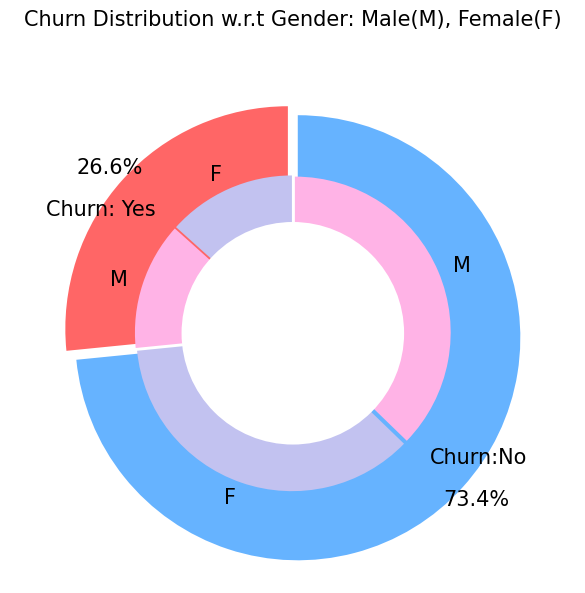

In [69]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [70]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

# Customers with monthly contract are more likely to churn

In [71]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [72]:
 data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [73]:
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [74]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [75]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [76]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [77]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [78]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [79]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [80]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [81]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

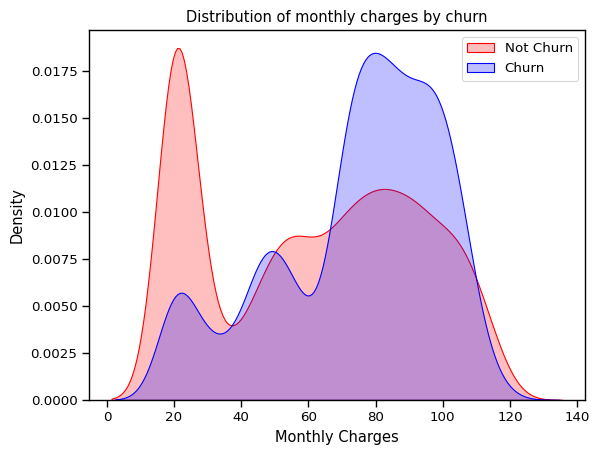

In [82]:
# KDE plot
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

# Customers with higher monthly charges are more likely to churn

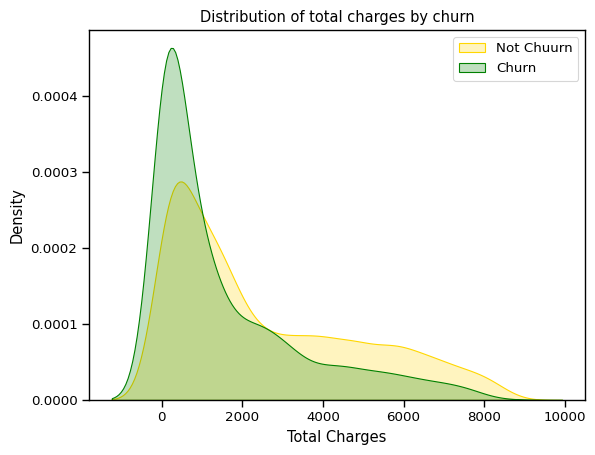

In [83]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [84]:
# Box Plot Skewness of data
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

# New customers are more likely to churn

In [85]:
## In summary, this code snippet is designed to label encode categorical columns in a DataFrame that have two or fewer unique values.
## It uses the LabelEncoder from the sklearn library to convert these categorical values into numerical format, which is often necessary for
## machine learning tasks. The code keeps track of how many columns were encoded and prints this information at the end. This process helps prepare
## the dataset for further analysis or modeling.

#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique
values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

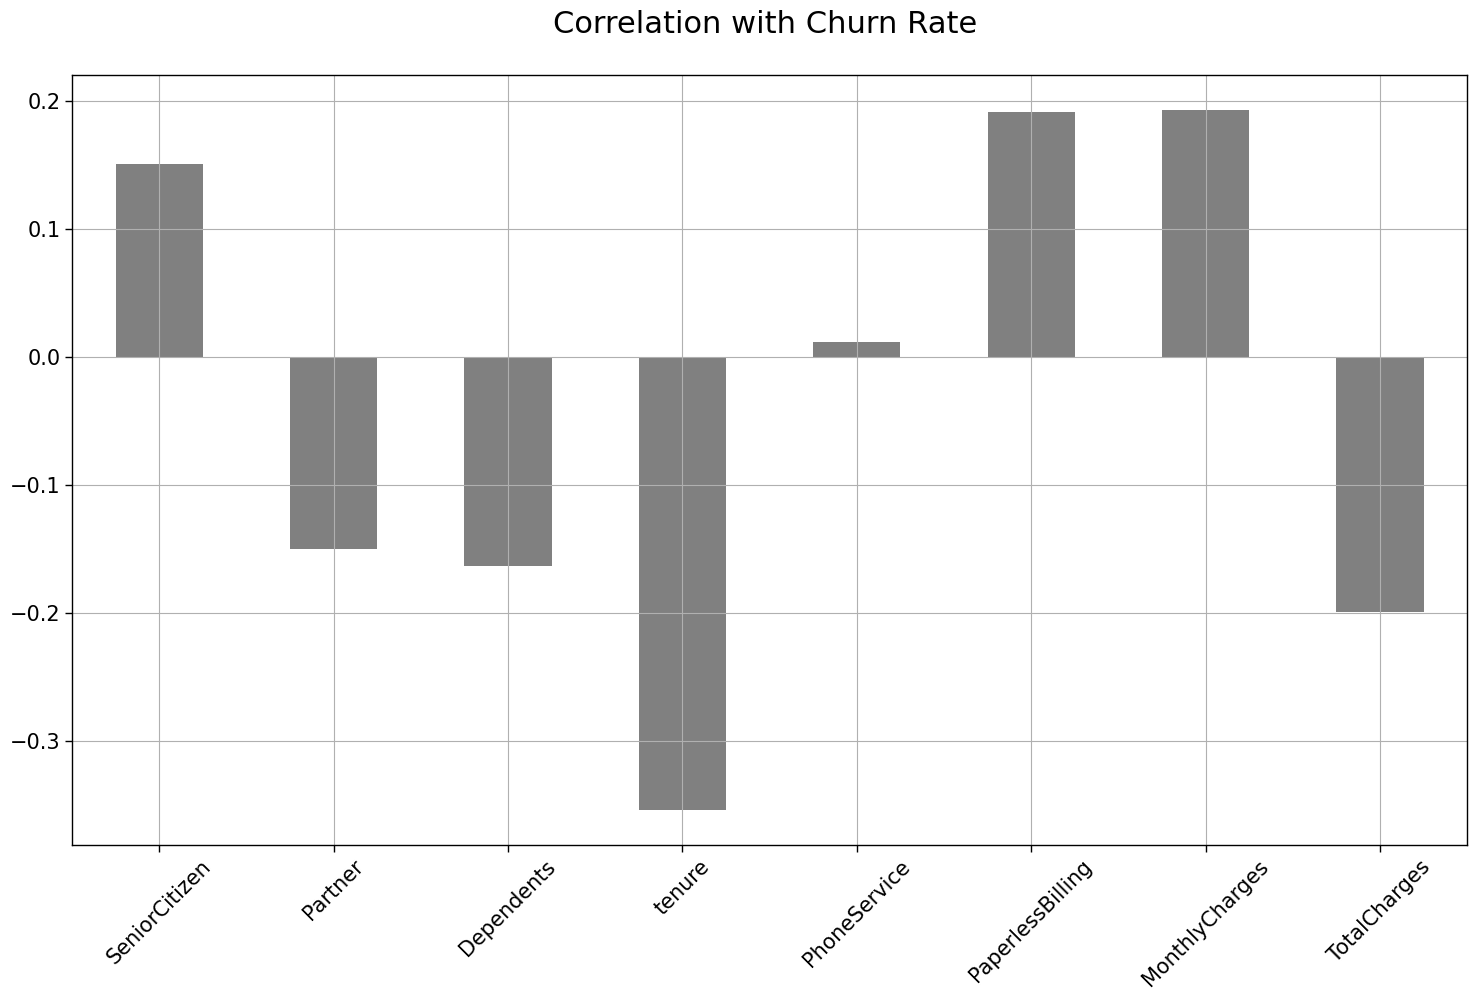

In [86]:
# corelation matrix show Positive relation or negative relation with attributes
# also you can check which attribute has minor impact so we can remove this attribute because its not helping in predictin

# In summary, this code snippet is designed to analyze and visualize the correlation between various features in a dataset and the target
# variable Churn. It creates a subset of relevant features, computes their correlations with Churn, separates them into positive and negative
# correlations, and then visualizes these correlations in a bar plot. This analysis can help identify which features are most influential in
# predicting customer churn, providing valuable insights for further analysis or modeling.

# This line creates a new DataFrame data2 that contains a specific subset of columns from the original DataFrame data
data2 = data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

# This line calculates the correlation of each column in data2 with the Churn column from the original DataFrame data. The corrwith method computes the pairwise correlation of the columns, resulting in a Series of correlation coefficients.
correlations = data2.corrwith(data.Churn)

# This line filters out any correlations that are equal to 1, which would indicate a perfect correlation (i.e., a variable is perfectly correlated with itself). Since we are interested in correlations with Churn, this step ensures that we only keep relevant correlations.
correlations = correlations[correlations!=1]

#  Contains the correlations that are greater than 0, sorted in descending order. This indicates features that positively correlate with customer churn.
positive_correlations = correlations[correlations >0].sort_values(ascending = False)

# Contains the correlations that are less than 0, also sorted in descending order. This indicates features that negatively correlate with customer churn.
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

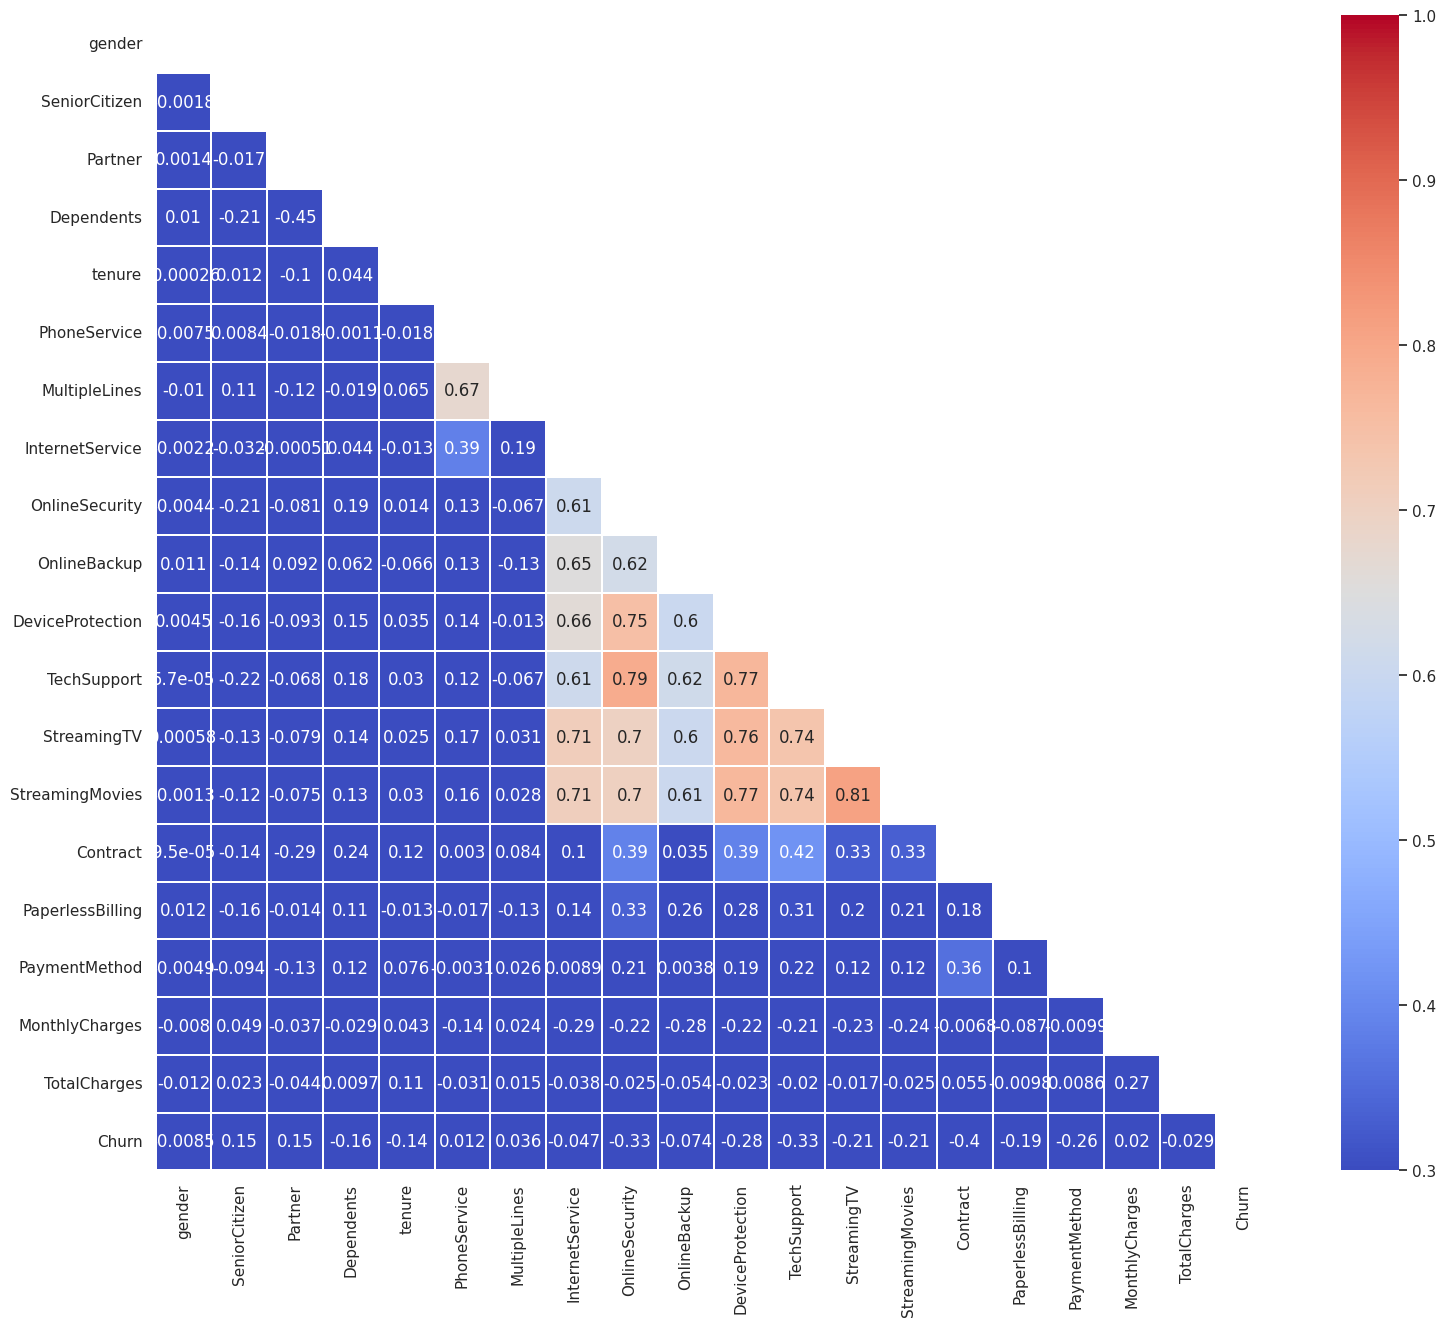

In [87]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

# The apply method is used to apply a function to each column of the DataFrame. The function pd.factorize(x)[0] converts each column into numerical format. pd.factorize returns two outputs: the first is an array of the encoded values, and the second is an array of the unique values. By selecting the first output ([0]), we get the encoded numerical values for each column.
# After factorizing the columns, the corr() method computes the pairwise correlation coefficients between the columns of the resulting DataFrame. The result is a correlation matrix, which shows how each feature is correlated with every other feature.
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

#np.ones_like(corr, dtype=bool): This creates an array of the same shape as the correlation matrix corr, filled with ones (1s), and specifies that the data type is boolean.
# np.triu(...): This function takes the array of ones and returns the upper triangle of the array, setting the lower triangle to False. The purpose of this mask is to hide the upper triangle of the heatmap, as the correlation matrix is symmetric (i.e., the correlation of A with B is the same as the correlation of B with A).
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<Axes: >

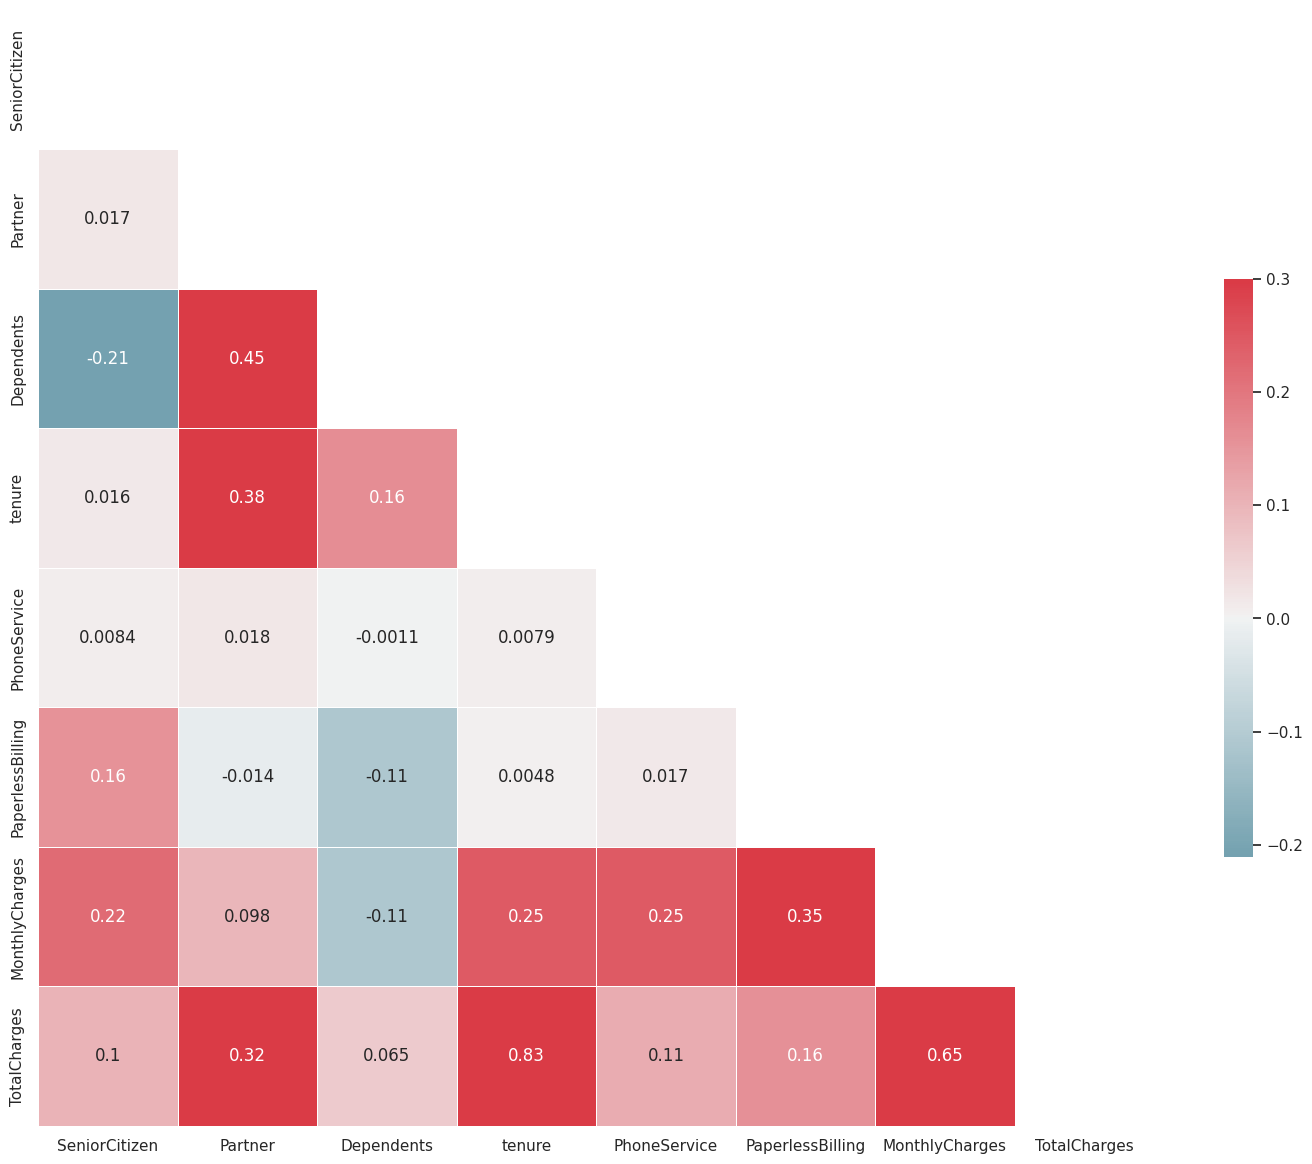

In [88]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = data2.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True,annot = True, linewidths=.5, cbar_kws={"shrink": .5})

# Multicollinearity check using VIF

In [89]:
#TODO: from statsmodels.stats.outliers_influence import variance_inflation_factor data_ = pd.read_csv("data.csv") X = data_[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

# vif_data = pd.DataFrame() vif_data["feature"] = X.columns

#calculating VIF for each feature vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# print(vif_data)

In [90]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [91]:
X = data.drop(columns = "Churn")
y = data["Churn"].values

In [92]:
# For class Imbalance we use stratify check tarin and test have similar distribution of target varriable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [93]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

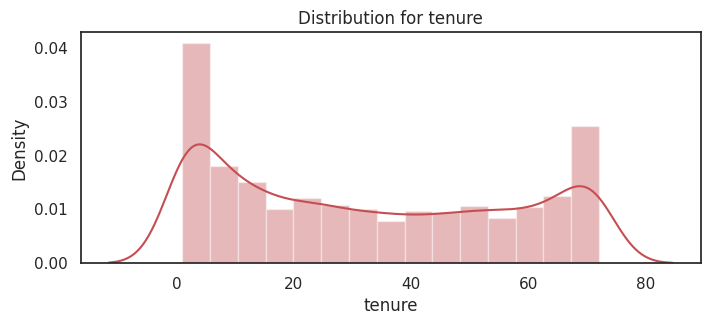

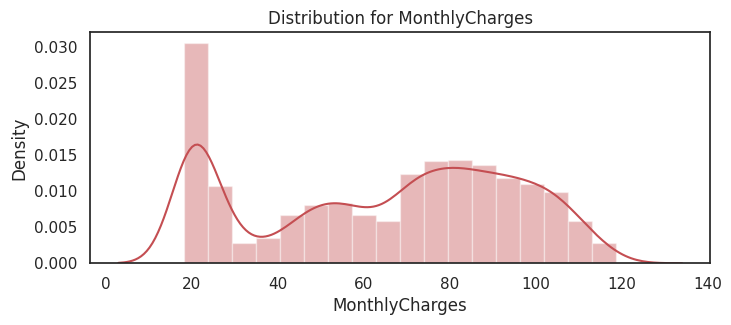

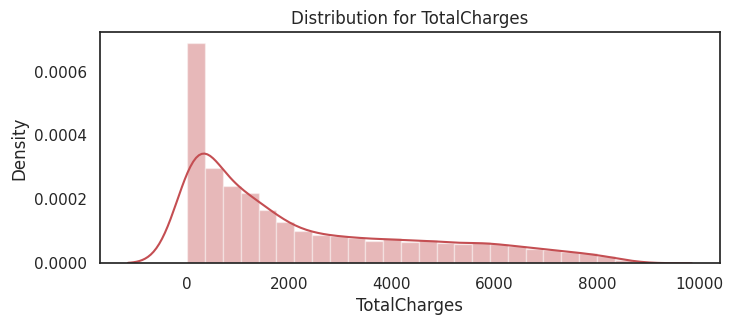

In [94]:
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

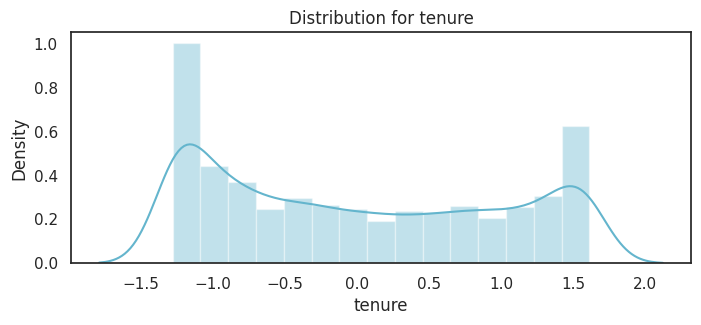

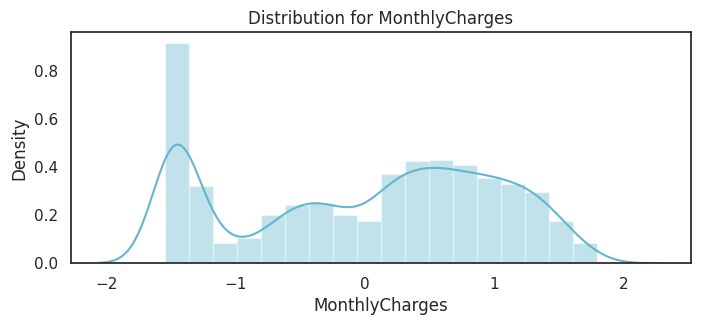

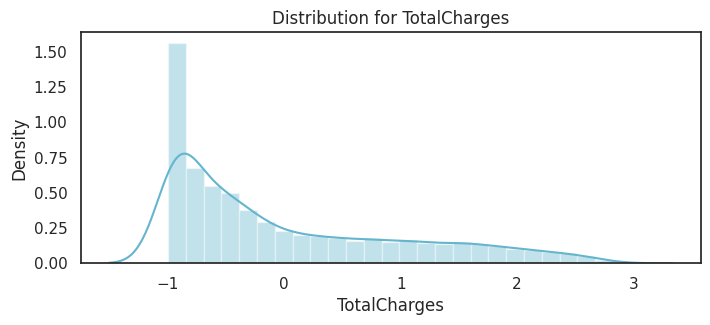

In [95]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [96]:
#The features need standard scaling as all of them are distributed over different range values

In [97]:
# StandardScaler(): This is a class from the sklearn.preprocessing module that standardizes features by removing the mean and scaling to unit variance. It transforms the data so that it has a mean of 0 and a standard deviation of 1.
# fit_transform(data[col]): This method fits the StandardScaler to the specified columns (col) in the DataFrame data and then transforms those columns. The result is a NumPy array containing the standardized values.
# astype('float64'): This converts the transformed data to the float64 data type. StandardScaler returns values in a NumPy array, and this step ensures that the resulting DataFrame has a consistent data type.
# pd.DataFrame(..., columns=col): This wraps the standardized data in a new Pandas DataFrame, assigning the original column names (col) to the new DataFrame. The result, data_std, is a DataFrame containing the standardized values of the specified columns.#

In [98]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
# Shoe unique values of each column
for i in data.columns:
    print(i, ": ", data[i].unique())

gender :  [0 1]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [1 0 2]
InternetService :  [0 1 2]
OnlineSecurity :  [0 2 1]
OnlineBackup :  [2 0 1]
DeviceProtection :  [0 2 1]
TechSupport :  [0 2 1]
StreamingTV :  [0 2 1]
StreamingMovies :  [0 2 1]
Contract :  [0 1 2]
PaperlessBilling :  [1 0]
PaymentMethod :  [2 3 0 1]
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [100]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['Partner', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'SeniorCitizen', 'gender', 'Dependents', 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'OnlineSecurity', 'StreamingTV', 'PaperlessBilling']


In [101]:
# In summary, this code snippet is designed to identify and categorize the columns in a DataFrame (X_train) based on their encoding requirements:

# It explicitly lists the columns that require one-hot encoding (cat_cols_ohe).
# It dynamically calculates the remaining categorical columns that require label encoding (cat_cols_le) by subtracting the sets of columns that don't need encoding or are already designated for one-hot encoding from the set of all columns in X_train.
# Finally, it prints the list of columns that will undergo label encoding.
# This organization is important in the preprocessing stage of machine learning, as it ensures that categorical variables are properly transformed into a numerical format suitable for model training.

In [102]:
scaler = StandardScaler().fit(X_train[col])  # Fit on training data
X_train[col] = scaler.transform(X_train[col])  # Transform training data
X_test[col] = scaler.transform(X_test[col])    # Transform test data using the same scaler

In [103]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')))

# Evaluating the model Results

In [104]:
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i] = [name,
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)



,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
9,Voting Classifier,84.94,1.39,80.21,1.88
8,Gradient boost classifier,84.72,1.42,79.76,1.95
7,Adaboost,84.55,1.25,80.09,1.77
0,Logistic Regression,84.39,1.47,74.38,1.94
1,SVC,82.99,2.07,79.11,2.01
6,Random Forest,82.75,2.01,78.67,1.98
4,Gaussian NB,82.32,1.28,75.38,1.23
2,Kernel SVM,79.65,2.12,79.26,1.67
3,KNN,77.15,1.47,75.88,2.02
5,Decision Tree Classifier,66.67,1.07,73.73,1.12


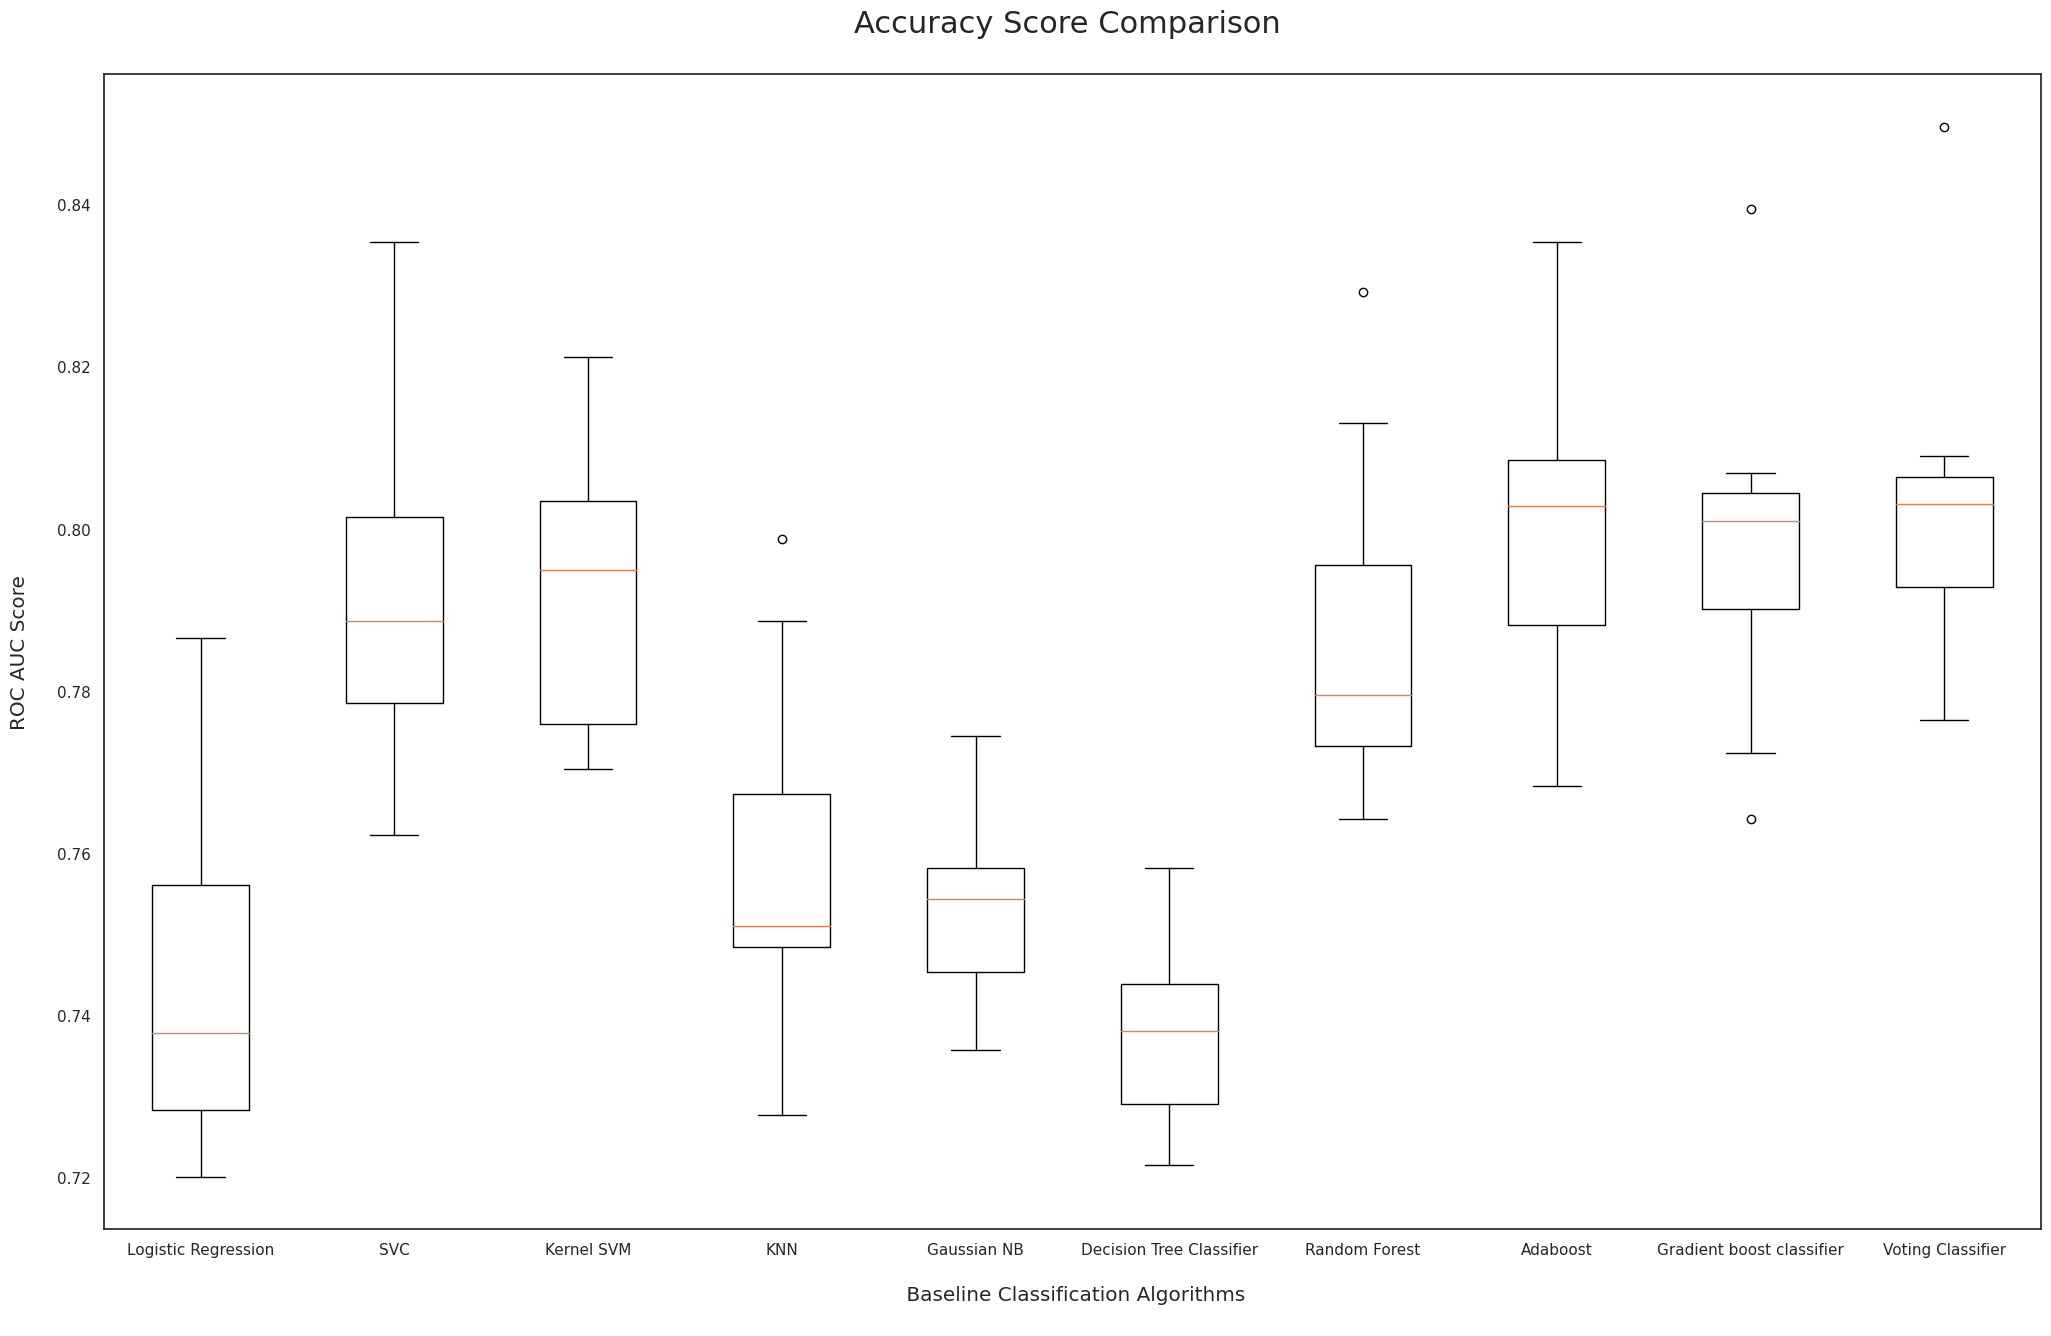

In [109]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

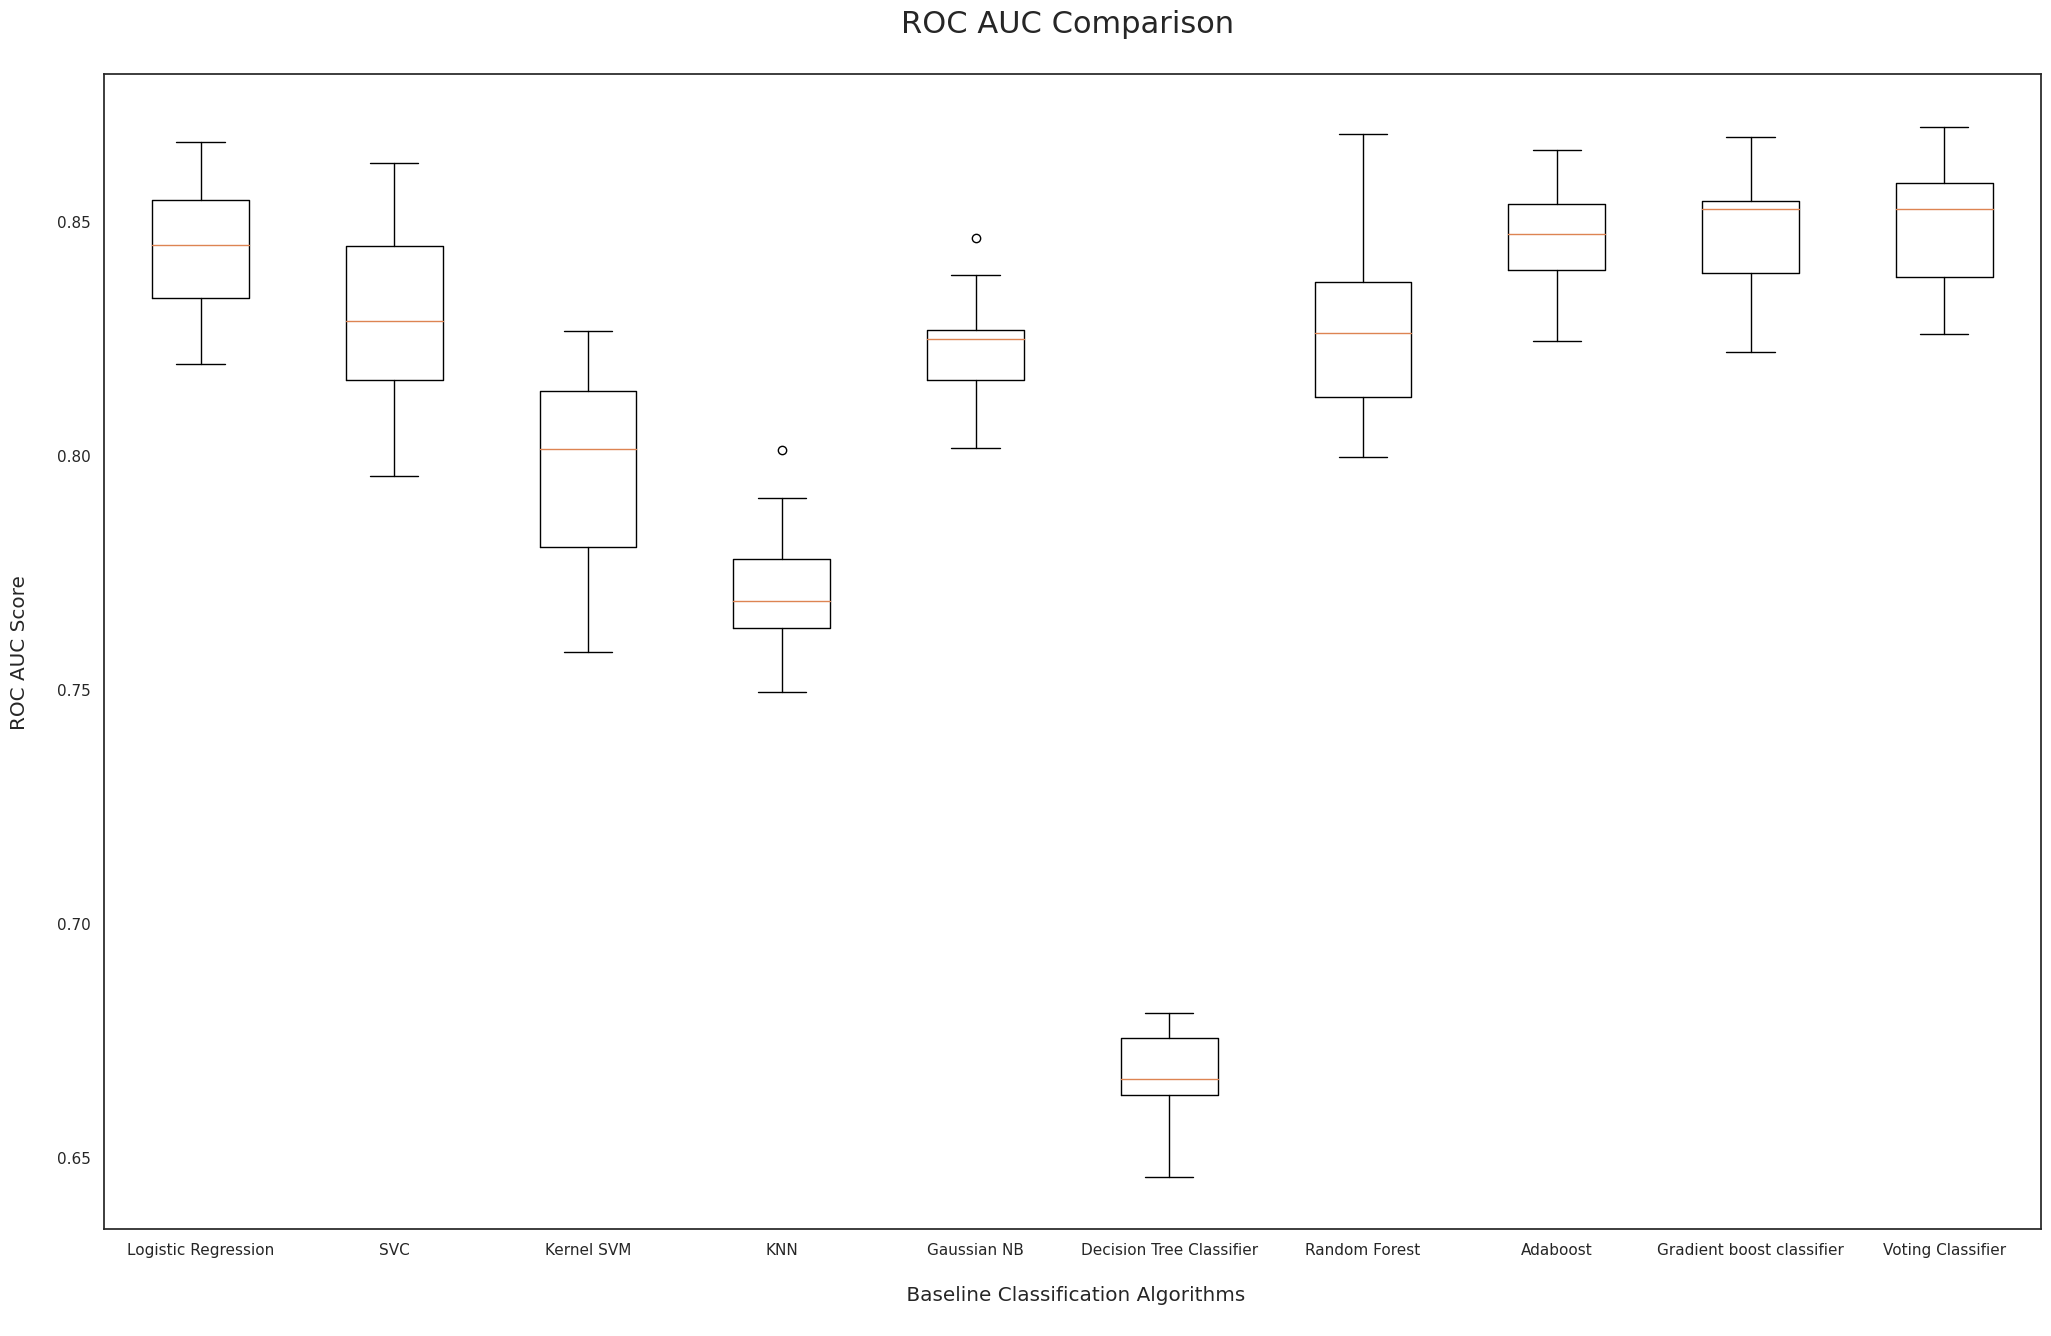

In [110]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [111]:
# KNN
score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.7222748815165877,
 0.7573459715639811,
 0.7502369668246446,
 0.7720379146919432,
 0.7729857819905214,
 0.7895734597156399,
 0.7800947867298578,
 0.7853080568720379,
 0.7767772511848341,
 0.785781990521327,
 0.7791469194312797,
 0.7815165876777251,
 0.781042654028436,
 0.7805687203791469,
 0.7796208530805687,
 0.7853080568720379,
 0.785781990521327,
 0.7919431279620853,
 0.790521327014218,
 0.7928909952606635,
 0.7914691943127962,
 0.7895734597156399,
 0.7919431279620853,
 0.7924170616113744]

## KNN

In [112]:
best_score = max(score_array)
best_n_neighbors = score_array.index(best_score) + 1

print(f"Best Score: {best_score}")
print(f"Best n_neighbors: {best_n_neighbors}")

Best Score: 0.7928909952606635
Best n_neighbors: 20


In [113]:
max(score_array)

0.7928909952606635

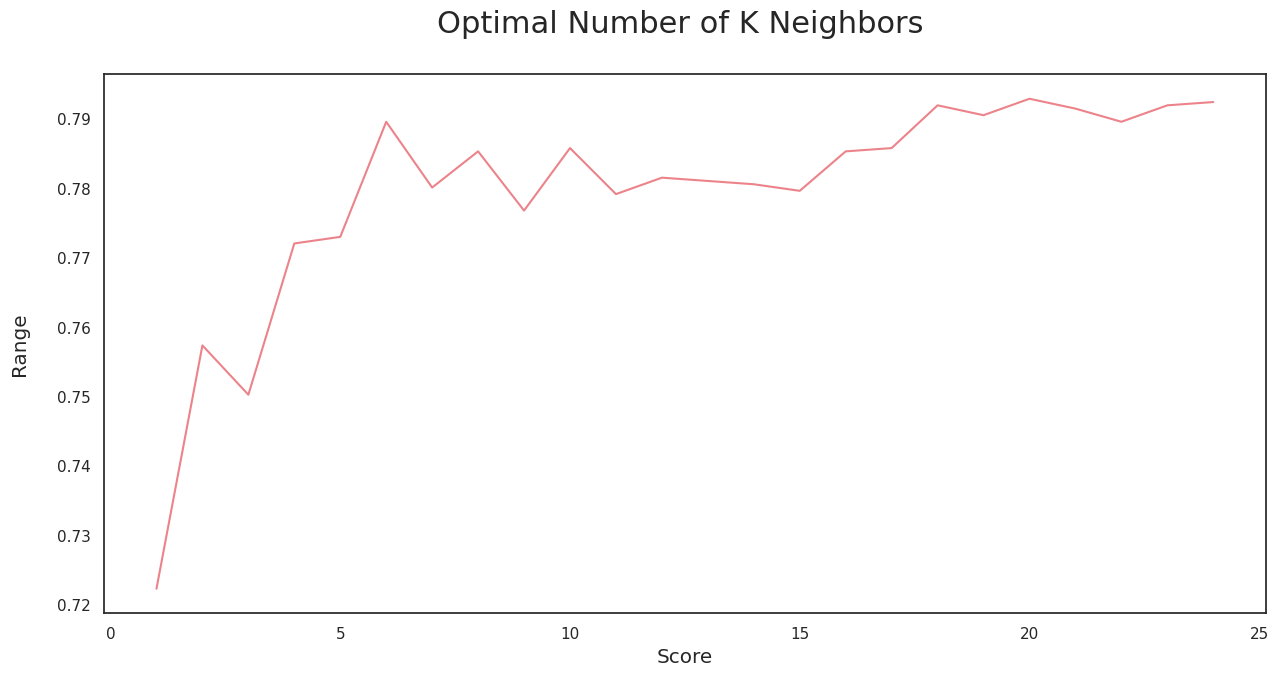

In [114]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')

plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")


plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Random Forest

In [115]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [116]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7151658767772512
2 : 0.7554502369668247
3 : 0.7421800947867299
4 : 0.7644549763033175
5 : 0.7601895734597156
6 : 0.7748815165876777
7 : 0.7625592417061612
8 : 0.7687203791469195
9 : 0.7729857819905214
10 : 0.7696682464454976
11 : 0.7639810426540284
12 : 0.771563981042654
13 : 0.7687203791469195
14 : 0.7748815165876777
15 : 0.7748815165876777
16 : 0.7767772511848341
17 : 0.7691943127962085
18 : 0.7753554502369668
19 : 0.776303317535545
20 : 0.7777251184834123
21 : 0.7758293838862559
22 : 0.7786729857819905
23 : 0.7805687203791469
24 : 0.7819905213270142
25 : 0.7843601895734598
26 : 0.7867298578199052
27 : 0.7834123222748816
28 : 0.7824644549763033
29 : 0.7829383886255924
30 : 0.7819905213270142
31 : 0.7819905213270142
32 : 0.7843601895734598
33 : 0.7824644549763033
34 : 0.7824644549763033
35 : 0.7800947867298578
36 : 0.7824644549763033
37 : 0.7819905213270142
38 : 0.7824644549763033
39 : 0.7834123222748816
40 : 0.7848341232227488
41 : 0.7848341232227488
42 : 0.7829383886255924
43 

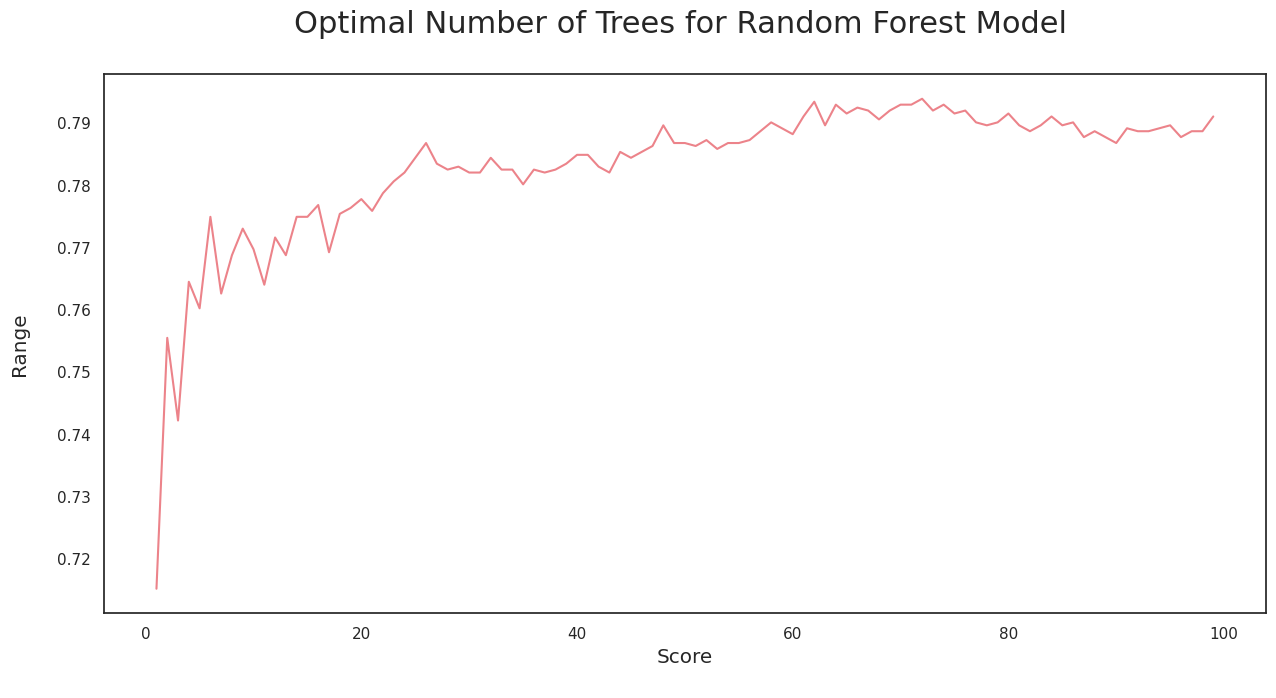

In [117]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## 2nd Iteration

In [118]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [119]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)





#Voting Classifier

classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()),
                                            ('abc', AdaBoostClassifier())], voting='soft')



classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

In [120]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

In [121]:

# Assuming lr, svm, knn, k_svm, nb, dt, rf, ab, gb, vc are DataFrames
eval_ = pd.concat([lr, svm, knn, k_svm, nb, dt, rf, ab, gb, vc]) \
          .sort_values(["Precision", "Recall", "F2 Score"], ascending=False) \
          .reset_index(drop=True)

eval_

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Adaboost,0.812322,0.686230,0.541889,0.605578,0.565687
1,Voting Classifier,0.808531,0.672527,0.545455,0.602362,0.566877
2,Gradient Boost,0.804265,0.671296,0.516934,0.584089,0.541854
3,Kernel SVM,0.793839,0.660714,0.461676,0.543547,0.491275
4,Logistic Regression,0.806161,0.658333,0.563280,0.607109,0.580029
5,Random Forest,0.794787,0.645455,0.506239,0.567433,0.529061
6,K-Nearest Neighbours,0.789573,0.630290,0.504456,0.560396,0.525436
7,SVM (Linear),0.788626,0.628635,0.500891,0.557540,0.522111
8,Naive Bayes,0.757346,0.531777,0.730838,0.615616,0.679934
9,Decision Tree,0.733175,0.498233,0.502674,0.500444,0.501779


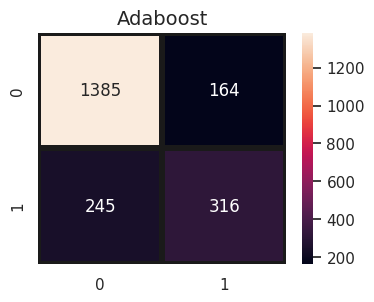

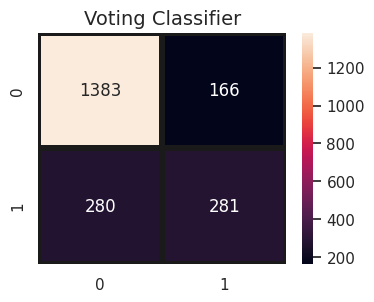

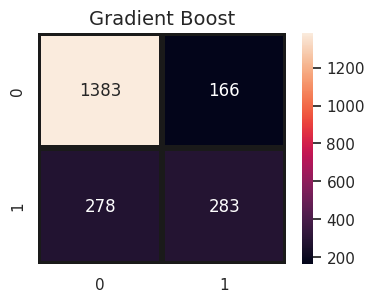

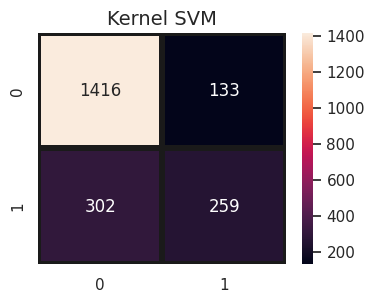

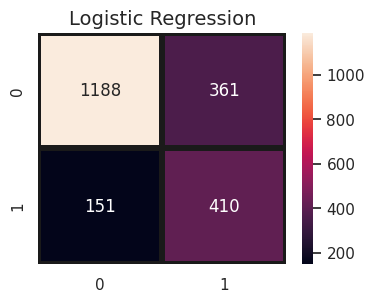

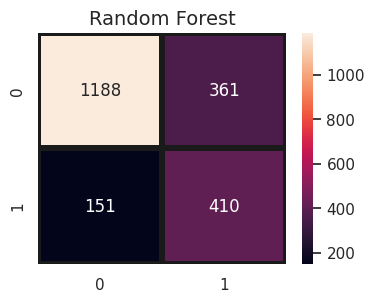

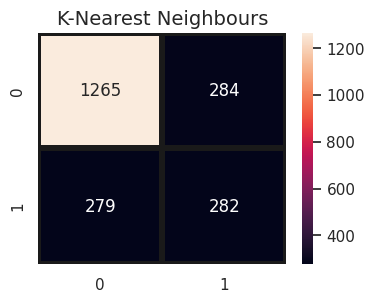

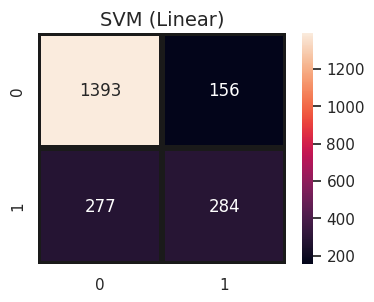

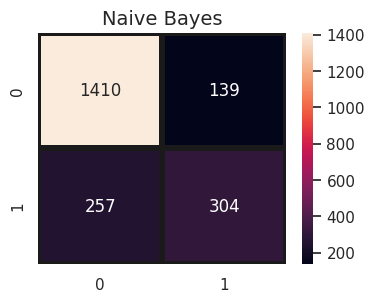

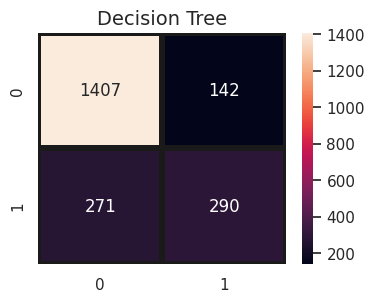

In [122]:
predictions = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()

<b>k-Fold Cross-Validation</b>: Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [123]:
#TODO: Model Evaluation


In [124]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [125]:
k_fold_cross_validation(classifier8, "Adaboost")


Adaboost accuracy: 0.80 (+/- 0.03)


In [126]:
k_fold_cross_validation(classifier10, "Voting classifier")

Voting classifier accuracy: 0.80 (+/- 0.04)


In [127]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.80 (+/- 0.04)


In [128]:
k_fold_cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.80 (+/- 0.04)


In [129]:
k_fold_cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.80 (+/- 0.03)


In [130]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train)
    probs = classifier_.predict_proba(X_test)
    probs = probs[:, 1]
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr,
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "22",
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()



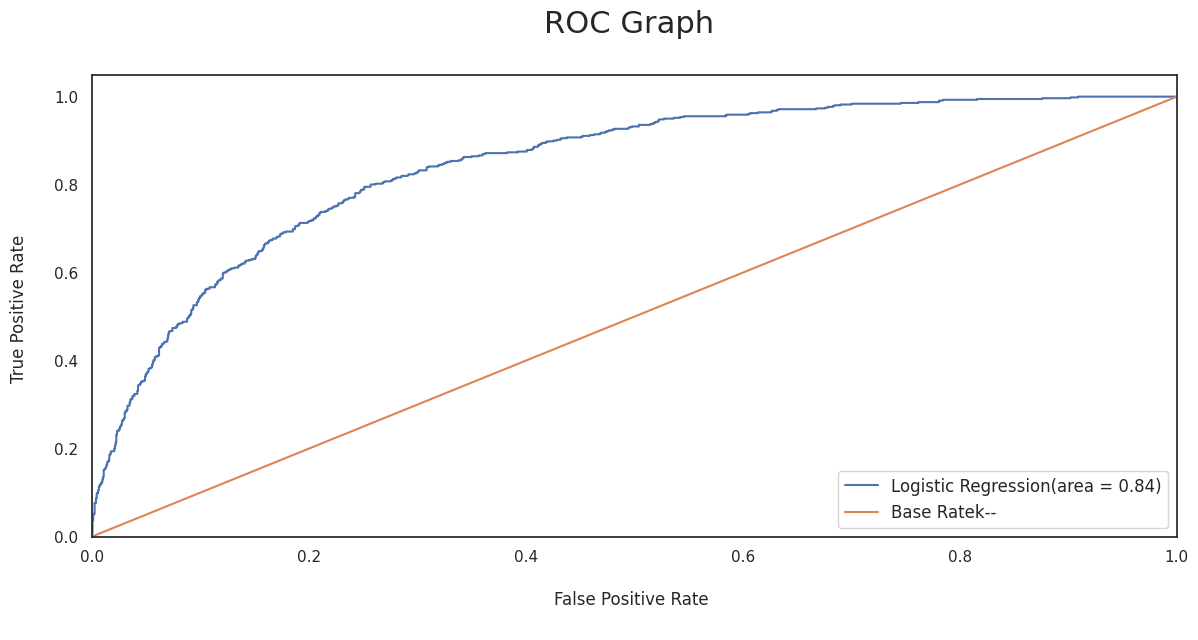

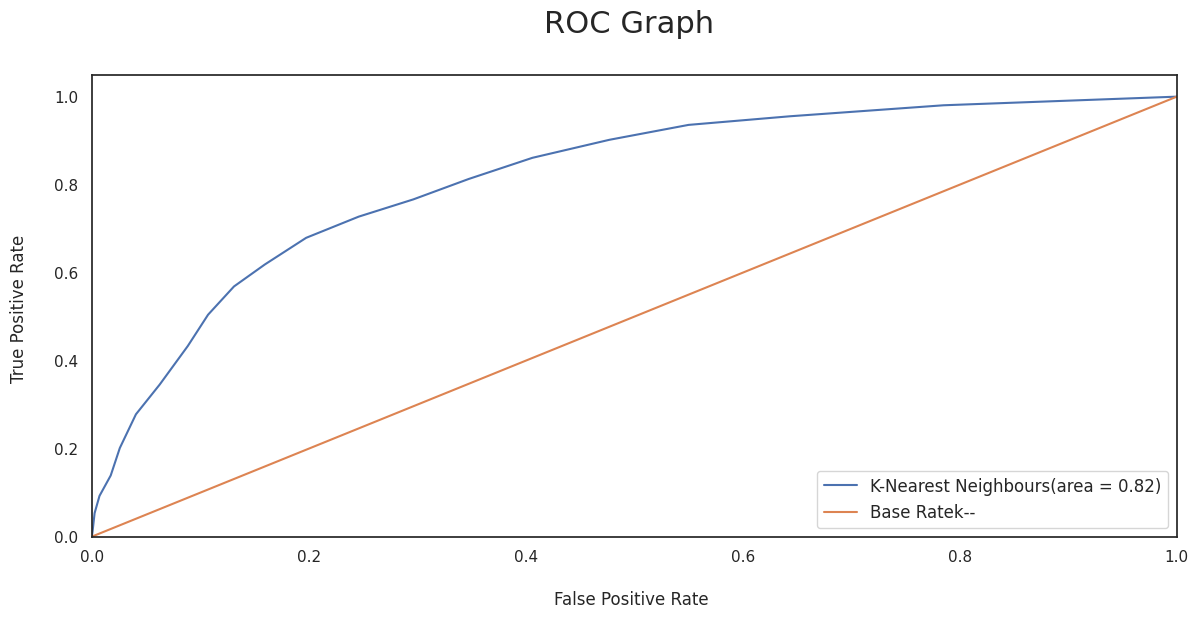

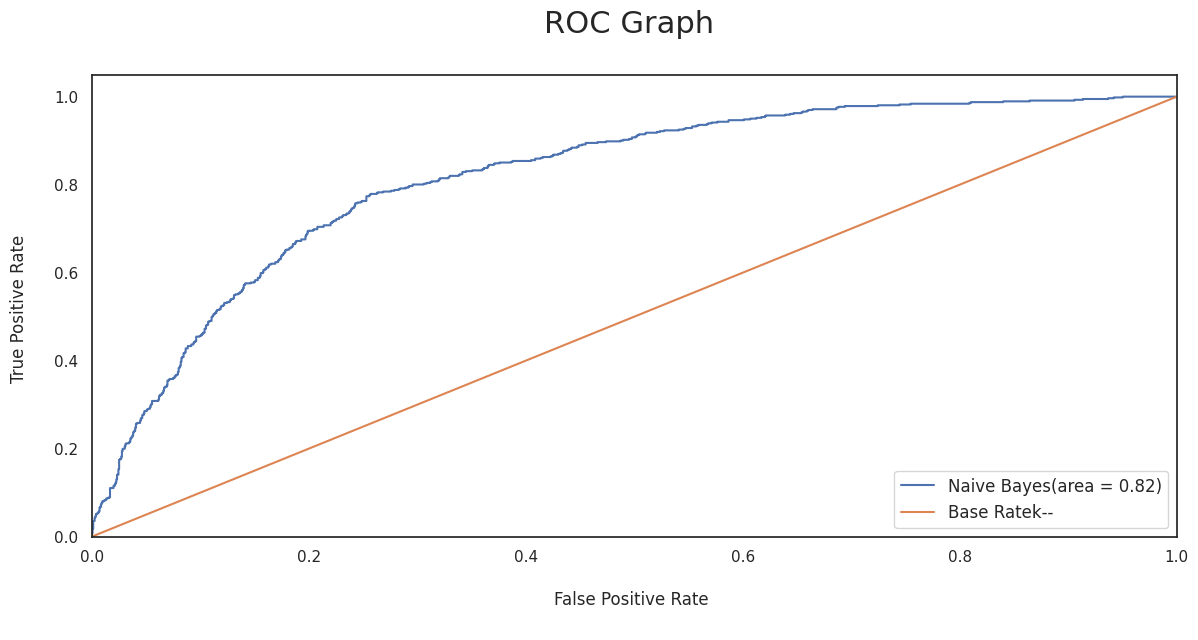

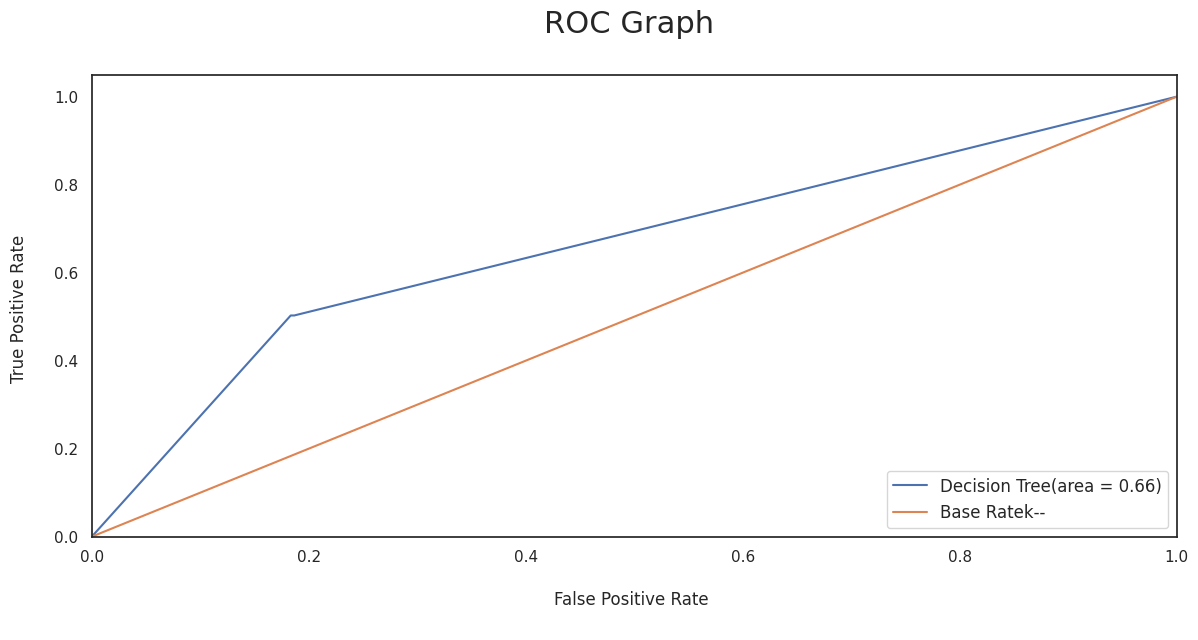

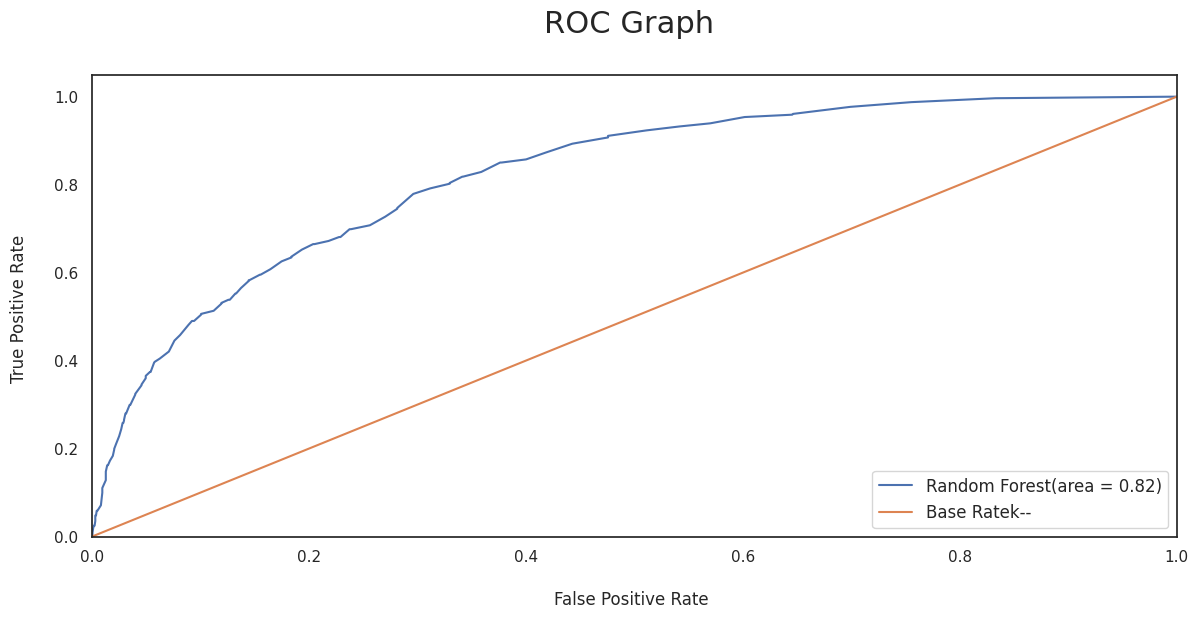

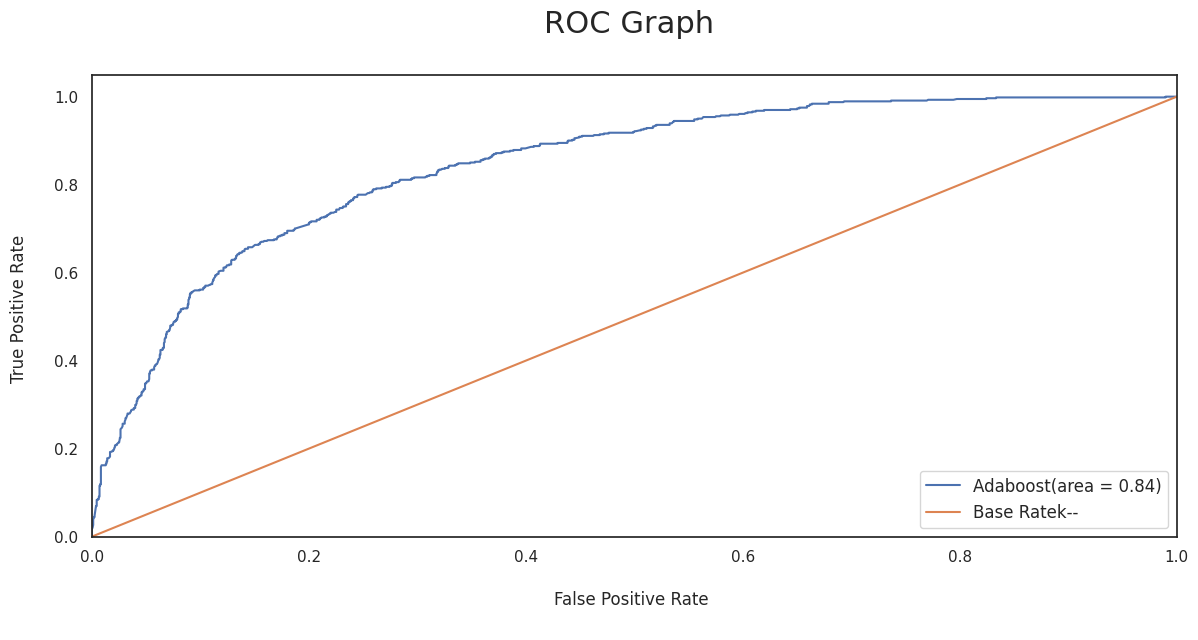

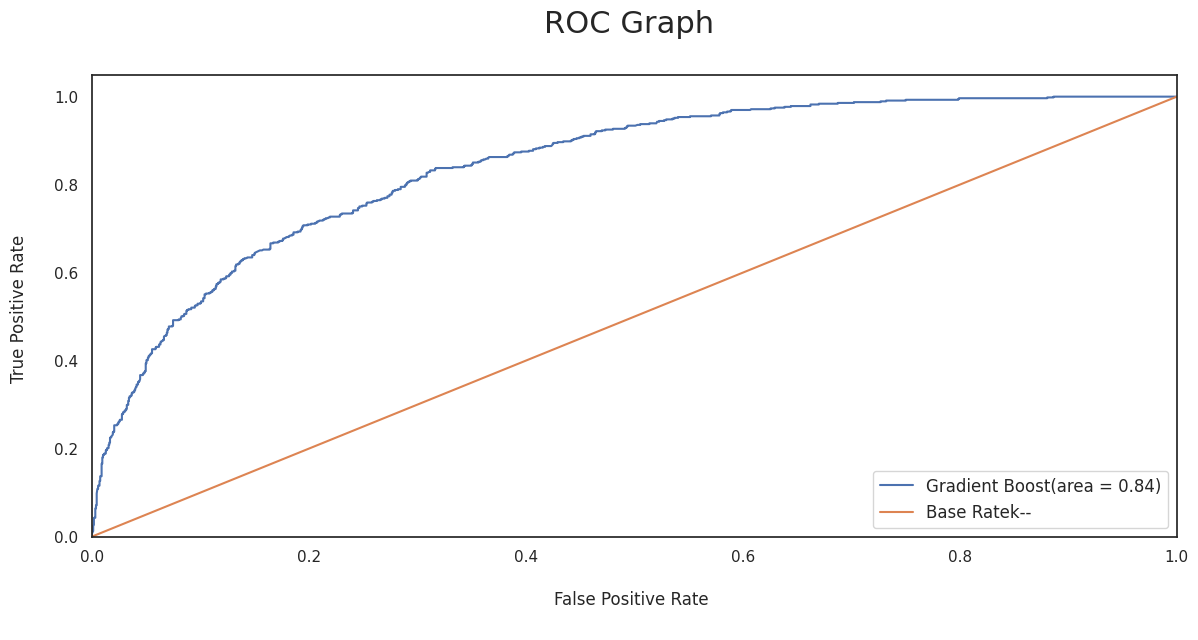

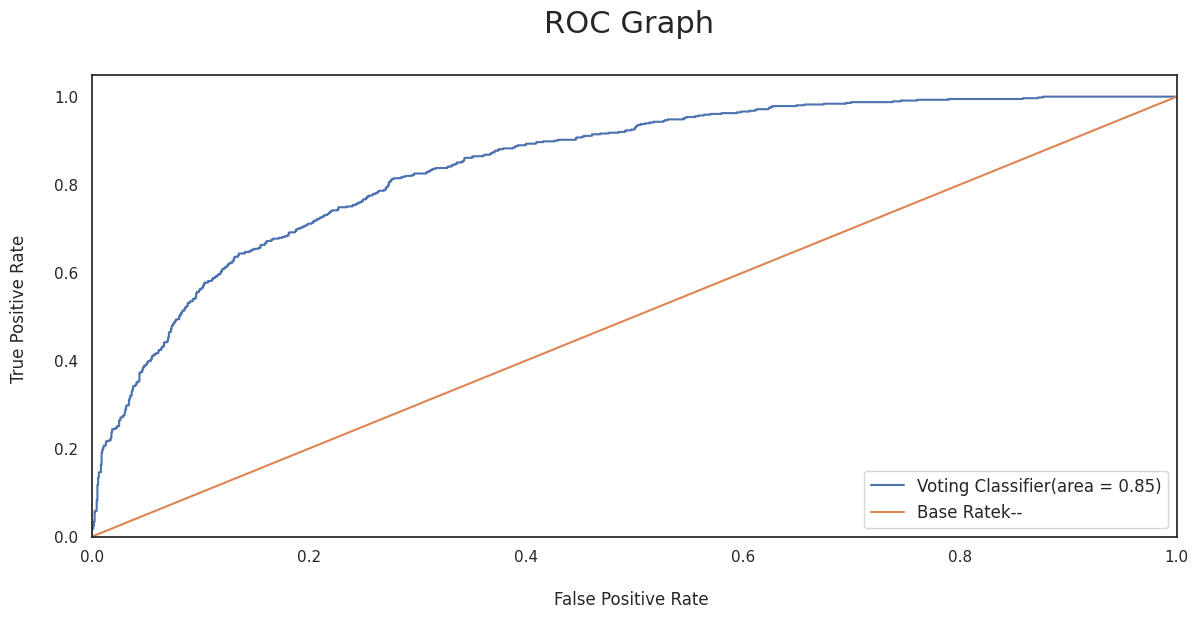

In [131]:
preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9, classifier10]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost",  "Voting Classifier"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k)

# The purpose of this code is to evaluate multiple classifiers using cross-validation and summarize their performance metrics (mean accuracy and standard deviation) in a dictionary format. This approach allows for easy comparison of different models based on their cross-validated performance.

In [132]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]

    return cvDict

In [133]:
cvD = cvDictGen(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [0.8418251806661357, 0.010327512742453856],
 'KNeighborsClassifier': [0.7912542650895215, 0.00825470479912222],
 'GaussianNB': [0.8232386881685605, 0.00741678015498337],
 'DecisionTreeClassifier': [0.6470213137060805, 0.02196953973039052],
 'RandomForestClassifier': [0.8197874155380965, 0.011556155864106703],
 'AdaBoostClassifier': [0.8445838813774079, 0.01125665302188384],
 'GradientBoostingClassifier': [0.8447762111571164, 0.010758963085656093],
 'VotingClassifier': [0.8470588483443381, 0.0108648432206792]}

## Predicting feature importance

The purpose of this code snippet is to extract and display the feature importances from a Gradient Boosting model. By sorting the feature importances, you can easily identify which features contribute the most to the model's predictions. This information is valuable for understanding the model, feature selection, and improving interpretability.

In [134]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier9.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
14,Contract,0.403941
4,tenure,0.143002
17,MonthlyCharges,0.135920
18,TotalCharges,0.105635
8,OnlineSecurity,0.064292
11,TechSupport,0.055193
7,InternetService,0.024642
16,PaymentMethod,0.012230
1,SeniorCitizen,0.011863
15,PaperlessBilling,0.009874


In [135]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
18,TotalCharges,0.34
17,MonthlyCharges,0.20
4,tenure,0.14
14,Contract,0.12
16,PaymentMethod,0.04
8,OnlineSecurity,0.04
1,SeniorCitizen,0.02
11,TechSupport,0.02
15,PaperlessBilling,0.02
9,OnlineBackup,0.02


## Hyper Parameter tuning

## Using Randomized search CV

In [136]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [137]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 200, 'learning_rate': 0.1}, 0.8455660301203587)

In [138]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [139]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.845003216381335

### Gradient Boost

In [140]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b293890bac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b292b1a2440>},
                   scoring='roc_auc')

In [141]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 311},
 0.8416847189429009)

In [142]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [143]:
# Getting the score AdaBoost
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

0.8384312114422624

## Using Grid SearchCV

In [144]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
0.8470662551660079


In [145]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)

In [ ]:
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

Reference: https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

### Gradient Boost

In [146]:
gb_param_grid = {'loss' : ['deviance'],
                 'n_estimators': [10,100,200,300],
                 'max_depth': [1,2,4,6,8]}

gsGB = GridSearchCV(classifier9, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGB.fit(X_train,y_train)

gb_best = gsGB.best_estimator_
print(gb_best)
print(gsGB.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.

--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'deviance' instead.


In [147]:
gb_param_grid = {'loss' : ['log_loss'], # Changed 'deviance' to 'log_loss'
                 'n_estimators': [10,100,200,300],
                 'max_depth': [1,2,4,6,8]}

gsGB = GridSearchCV(classifier9, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGB.fit(X_train,y_train)

gb_best = gsGB.best_estimator_
print(gb_best)
print(gsGB.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
GradientBoostingClassifier(max_depth=1, n_estimators=300)
0.8481591522663035


In [149]:
estGBModFitted2 = gsGB.best_estimator_.fit(X_train, y_train)

# Changed 'bestGBModFitted2' to 'estGBModFitted2'
test_labels_gb2 = estGBModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_gb2 , average = 'macro', sample_weight = None)

0.8445561451295701